## Exploratory Data Analysis on Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

### Data

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

#### Missing Data

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

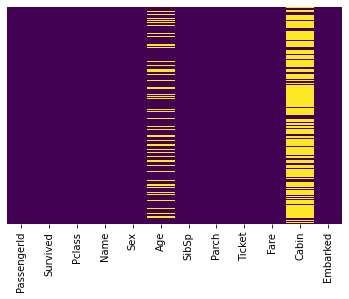

In [6]:
#### Visualize the null values 
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')
# yellow values below are the null values in that column

<AxesSubplot:xlabel='Survived', ylabel='count'>

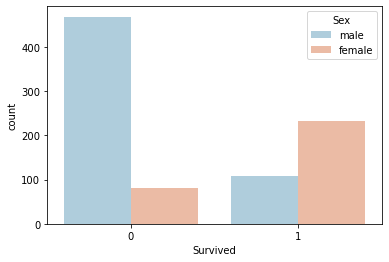

In [7]:
sns.countplot(x='Survived', data=train, hue='Sex', palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

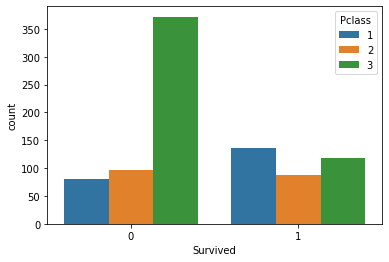

In [8]:
sns.countplot(x='Survived', data=train, hue='Pclass')

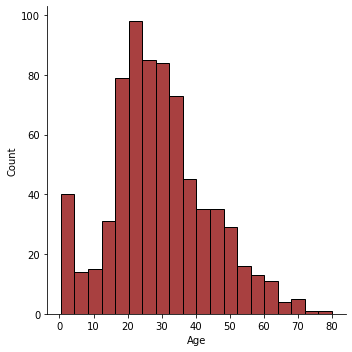

In [9]:
## what is the distribution of people's age on the ship
sns.displot(train['Age'].dropna(), kde=False,color='darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

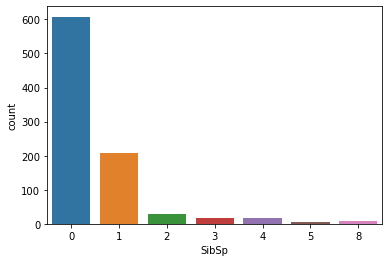

In [11]:
sns.countplot(x='SibSp', data=train) #Sibling and spouse

### Data Cleaning

In [14]:
# Fill the missing values of Age with mean or some other method. (Imputation) 

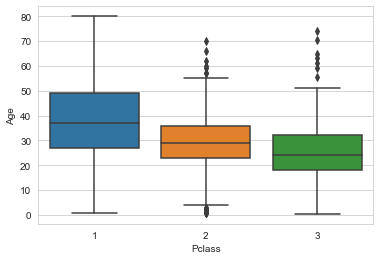

In [22]:
sns.boxplot(x='Pclass',y='Age',data=train)
sns.set_style(style='ticks')

In [16]:
#based on the above box plot, the average age is dependent on the class of travel.

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

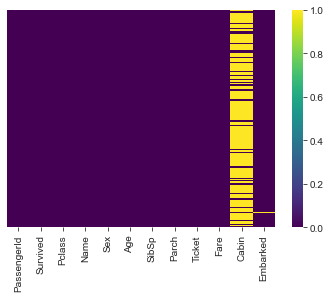

In [26]:
sns.heatmap(train.isnull(),yticklabels=False, cmap='viridis')

After the imputation, the age column has no more null values <br>
the Cabin has more null values than actual values and will not contribute to the analysis in any way. Hence its better to drop

In [27]:
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

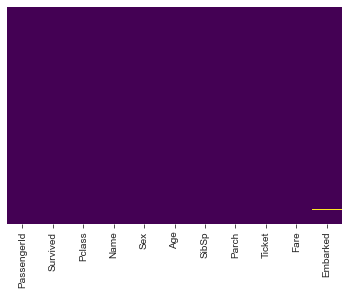

In [28]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Handling Categorical Columns

In [29]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [30]:
## Now drop the extra/unnecessary columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
## Add the new categorical features to the existing dataFrame
train = pd.concat([train, sex, embark],axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Train test split

In [34]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(X_train,y_train)

C:\Users\ramesh.annasamudram\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
predictions = lr.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
accuracy = confusion_matrix(y_test, predictions)

In [45]:
accuracy

array([[132,  22],
       [ 42,  72]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
a_score = accuracy_score(y_test, predictions)
a_score

0.7611940298507462